Trying KNeighborsClassifier - KNeighborsClassifier(n_jobs=-1, n_neighbors=50)
Got the result from ./1/predictions/KNeighborsClassifier.npy
{'classifier': 'Метод k ближайших соседей', 'Accuracy': 0.5955, 'AUC-ROC': 0.6321205, 'Precision': 0.5701689933872153, 'Recall': 0.776, 'F1-score': 0.6573485811096993}
Trying RandomForestClassifier - RandomForestClassifier(n_jobs=-1, random_state=42)
Got the result from ./1/predictions/RandomForestClassifier.npy
{'classifier': 'Случайный лес', 'Accuracy': 0.6265, 'AUC-ROC': 0.6747034999999999, 'Precision': 0.6313603322949117, 'Recall': 0.608, 'F1-score': 0.6194600101884871}
Trying HistGradientBoostingClassifier - HistGradientBoostingClassifier(max_depth=4, max_features=0.1, max_iter=20,
                               random_state=42, verbose=2)
Got the result from ./1/predictions/HistGradientBoostingClassifier.npy
{'classifier': 'Град. бустинг на основе гистограм', 'Accuracy': 0.633, 'AUC-ROC': 0.677627, 'Precision': 0.6222426470588235, 'Recall': 0.

,classifier,Accuracy,AUC-ROC,Precision,Recall,F1-score
0,Метод k ближайших соседей,0.5955,0.632120,0.570169,0.776,0.657349
1,Случайный лес,0.6265,0.674703,0.631360,0.608,0.619460
2,Град. бустинг на основе гистограм,0.6330,0.677627,0.622243,0.677,0.648467
3,CatBoost,0.6465,0.719936,0.643768,0.656,0.649827
4,XGBoost,0.6335,0.683081,0.629990,0.647,0.638382
5,Нейронная сеть для тополог. признаков,0.6325,0.672362,0.628766,0.647,0.637753
6,NaN,NaN,NaN,NaN,NaN,NaN
7,ResNet50 – базовая модель,0.6240,0.667135,0.627310,0.611,0.619048
8,Комбинированная нейронная сеть,0.5785,0.611339,0.582027,0.557,0.569239


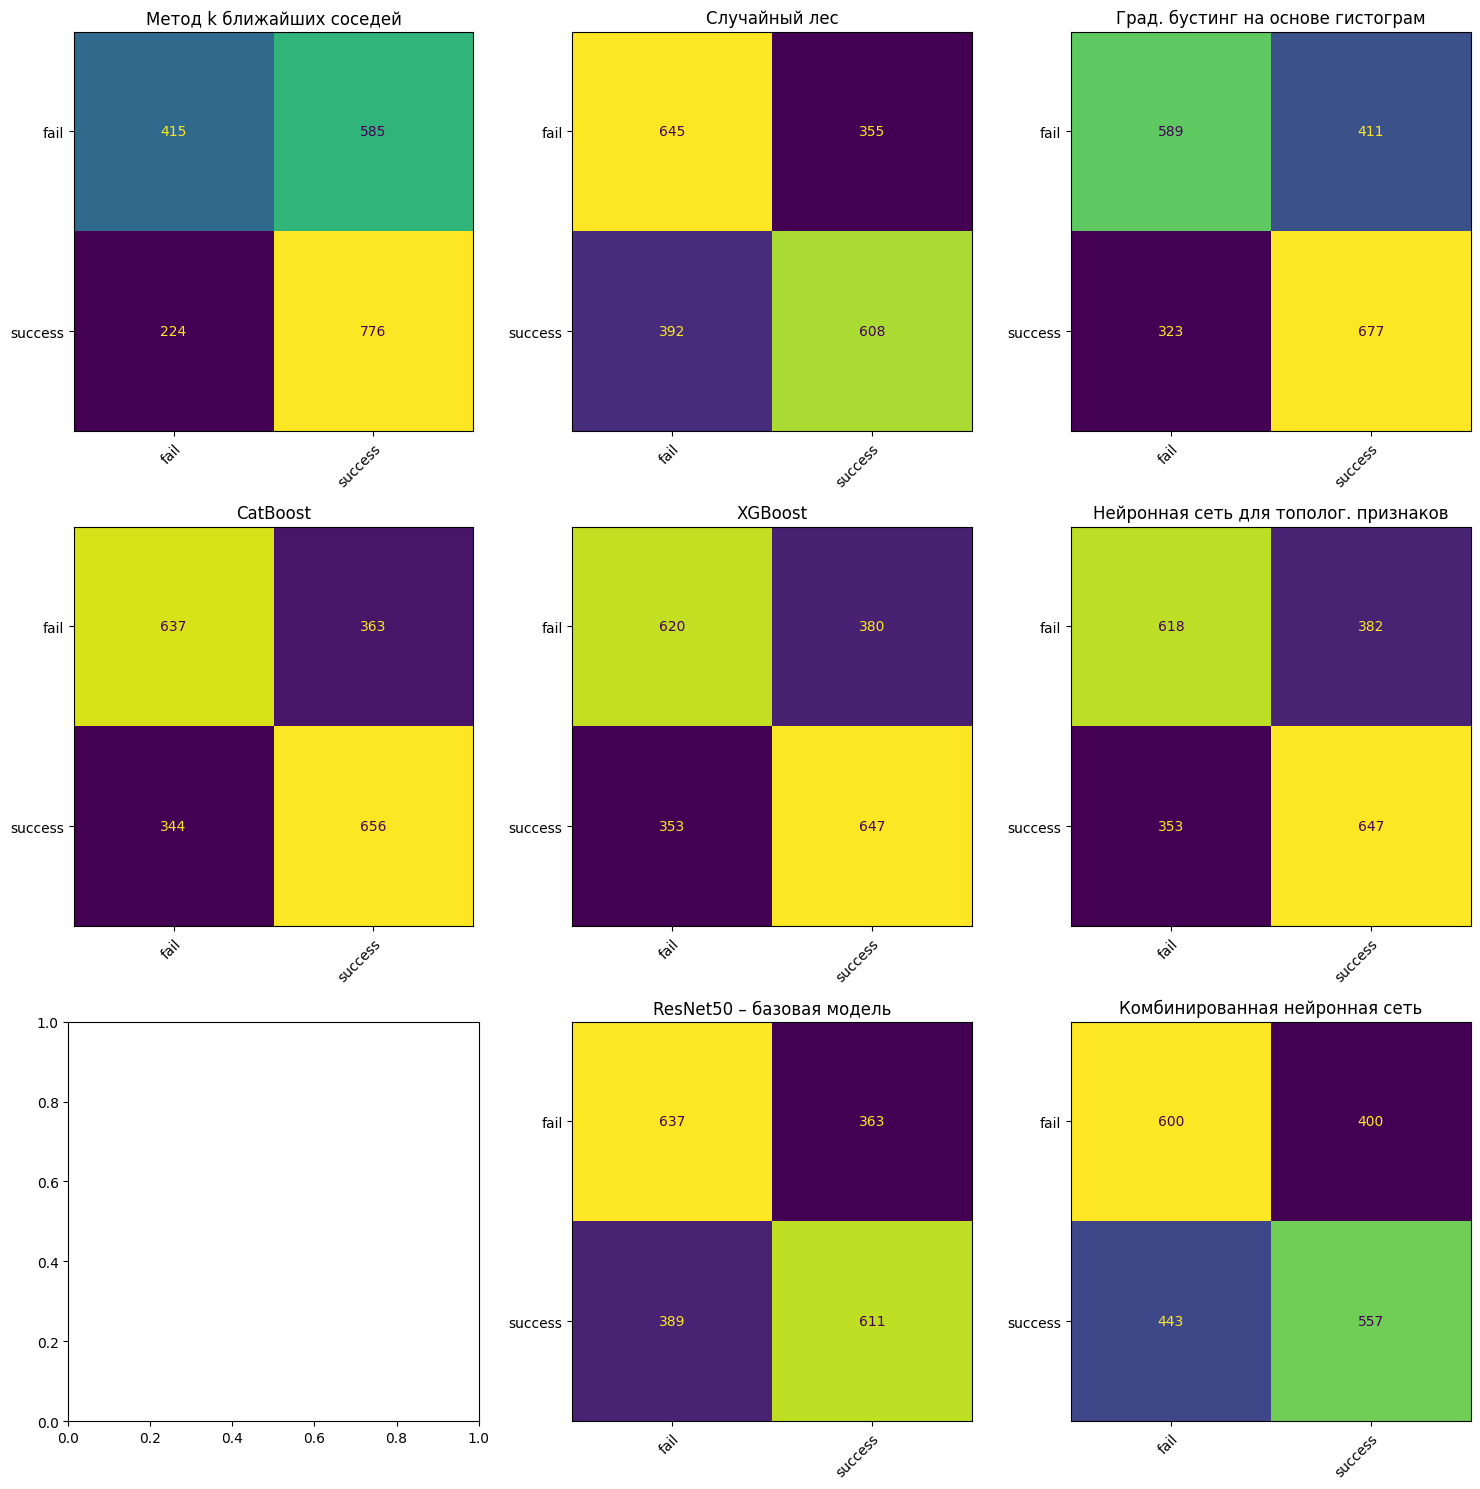

In [1]:
import numpy
import cvtda.classification

CLASSES = [ 'fail', 'success' ]

cvtda.classification.classify(
    None, None, numpy.load("1/front/train_labels.npy"), None,
    None, None, numpy.load("1/front/test_labels.npy"), None,
    without_diagrams = True, dump_name = "1/predictions",
    catboost_device = 'CPU', xgboost_device = 'cpu',
    only_get_from_dump = True, label_names = CLASSES
)
